<a href="https://colab.research.google.com/github/Siru-Song/tests/blob/main/pipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! pip install numpy matplotlib

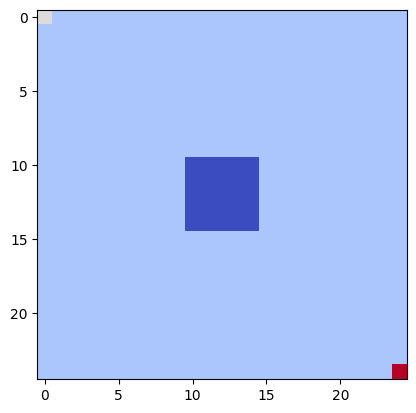

In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt

class PipeEnv:
    def __init__(self, grid_size, start, goal, obstacles):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        self.position = self.start
        self.done = False
        return self.position

    def step(self, action):
        if self.done:
            return self.position, 0, self.done

        # Define actions: 0=up, 1=right, 2=down, 3=left
        actions = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        move = actions[action]
        new_position = (self.position[0] + move[0], self.position[1] + move[1])

        if (0 <= new_position[0] < self.grid_size[0] and
            0 <= new_position[1] < self.grid_size[1] and
            new_position not in self.obstacles):
            self.position = new_position

        reward = -1  # default reward for each step
        if self.position == self.goal:
            reward = 100  # reward for reaching the goal
            self.done = True

        return self.position, reward, self.done

    def render(self, path=[]):
        grid = np.zeros(self.grid_size)
        grid[self.goal] = 2  # goal
        for obs in self.obstacles:
            grid[obs] = -1  # obstacles
        grid[self.start] = 0.5  # start
        for pos in path:
            grid[pos] = 0.7  # path

        plt.imshow(grid, cmap='coolwarm', interpolation='nearest')
        plt.show()

# Example usage
grid_size = (25, 25)
start = (0, 0)
goal = (24, 24)
obstacles = [(i, j) for i in range(10, 15) for j in range(10, 15)]
env = PipeEnv(grid_size, start, goal, obstacles)
env.render()


In [ ]:
class QLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def choose_action(self, state, explore=True):
        if explore and random.uniform(0, 1) < self.epsilon:
            return random.randint(0, 3)
        else:
            q_values = [self.get_q_value(state, a) for a in range(4)]
            return np.argmax(q_values)

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax([self.get_q_value(next_state, a) for a in range(4)])
        td_target = reward + self.gamma * self.get_q_value(next_state, best_next_action)
        td_error = td_target - self.get_q_value(state, action)
        new_q_value = self.get_q_value(state, action) + self.alpha * td_error
        self.q_table[(state, action)] = new_q_value

    def train(self, episodes):
        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            steps = 0
            while True:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                steps += 1
                if done:
                    break
            print(f"Episode {episode + 1}: Total Reward: {total_reward}, Steps: {steps}")

    def visualize_path(self):
        state = self.env.reset()
        path = [state]
        while True:
            action = self.choose_action(state, explore=False)
            state, _, done = self.env.step(action)
            path.append(state)
            if done:
                break
        self.env.render(path)

# Example usage
env = PipeEnv(grid_size=(25, 25), start=(0, 0), goal=(24, 24), obstacles=[(i, j) for i in range(10, 15) for j in range(10, 15)])
agent = QLearningAgent(env)
agent.train(episodes=1000)
agent.visualize_path()


Episode 1: Total Reward: -3432, Steps: 3533
Episode 2: Total Reward: -1927, Steps: 2028
Episode 3: Total Reward: -1402, Steps: 1503
Episode 4: Total Reward: -1697, Steps: 1798
Episode 5: Total Reward: -1875, Steps: 1976
Episode 6: Total Reward: -2954, Steps: 3055
Episode 7: Total Reward: -1496, Steps: 1597
Episode 8: Total Reward: -3984, Steps: 4085
Episode 9: Total Reward: -2195, Steps: 2296
Episode 10: Total Reward: -726, Steps: 827
Episode 11: Total Reward: -957, Steps: 1058
Episode 12: Total Reward: -2952, Steps: 3053
Episode 13: Total Reward: -1161, Steps: 1262
Episode 14: Total Reward: -1039, Steps: 1140
Episode 15: Total Reward: -280, Steps: 381
Episode 16: Total Reward: -1227, Steps: 1328
Episode 17: Total Reward: -1868, Steps: 1969
Episode 18: Total Reward: -1527, Steps: 1628
Episode 19: Total Reward: -395, Steps: 496
Episode 20: Total Reward: -1809, Steps: 1910
Episode 21: Total Reward: -2714, Steps: 2815
Episode 22: Total Reward: -698, Steps: 799
Episode 23: Total Reward: -3